<a href="https://colab.research.google.com/github/FaiqaRashid99/SleepDisorderClassification/blob/main/SleepDisorder(withDataAugmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ctgan --upgrade  # Upgrade to the latest version of CTGAN

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.0 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_classif
import random
from ctgan import CTGAN

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
file_path = '/content/drive/MyDrive/Datasets/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Replace NaN values in Sleep Disorder with "No Disorder"
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [ ]:
print('Unique Values of Occupation are', df['Occupation'].unique())

print('\nUnique Values of BMI Category are', df['BMI Category'].unique())

print('\nUnique Values of Sleep Disorder are', df['Sleep Disorder'].unique())

Unique Values of Occupation are ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Unique Values of BMI Category are ['Overweight' 'Normal' 'Obese' 'Normal Weight']

Unique Values of Sleep Disorder are ['No Disorder' 'Sleep Apnea' 'Insomnia']


In [ ]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [ ]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [ ]:
df = df.rename(columns={0: 'Upper_BP', 1: 'Lower_BP'})

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper_BP,Lower_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [ ]:
df['Upper_BP'] = df['Upper_BP'].astype(float)
df['Lower_BP'] = df['Lower_BP'].astype(float)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper_BP,Lower_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [ ]:
# Missing Values
missing_values=df.isnull().sum()
missing_values

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0


**Data Preprocessing**

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
# Encode categorical variables
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])


In [ ]:
# Display the dataset after encoding
print("\nDataset after encoding:\n")
df.head()


Dataset after encoding:



,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper_BP,Lower_BP
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,4,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0
4,5,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0


# CTGAN

In [ ]:
# Step 1: Initialize CTGAN
ctgan = CTGAN(
    epochs=3000,              # You can adjust epochs for training time vs. quality
    batch_size=500,           # Larger batch size for stable training
    generator_lr=2e-4,        # Learning rate for the generator
    discriminator_lr=2e-4,    # Learning rate for the discriminator
    verbose=True              # Display training progress
)

# Step 2: Fit CTGAN model
ctgan.fit(df, discrete_columns=categorical_features)

# Step 3: Generate synthetic data
num_samples = num_samples = 2000
synthetic_data = ctgan.sample(num_samples)

# Step 4: Post-processing
# Convert the synthetic data to a DataFrame
df_synthetic = pd.DataFrame(synthetic_data, columns=df.columns)




Gen. (-0.35) | Discrim. (-0.56): 100%|██████████| 3000/3000 [06:08<00:00,  8.14it/s]


In [ ]:
# Handle invalid categorical values and ensure proper encoding for each feature
for feature in categorical_features:
    original_classes = set(df[feature].unique())  # Get original encoded classes
    synthetic_classes = set(df_synthetic[feature].unique())  # Get synthetic classes

    # Find invalid classes
    invalid_classes = synthetic_classes - original_classes
    if invalid_classes:
        print(f"Invalid classes for {feature}: {invalid_classes}")

        # Replace invalid values with the most frequent value from the original data
        most_frequent_value = df[feature].value_counts().idxmax()
        df_synthetic[feature] = df_synthetic[feature].apply(
            lambda x: x if x in original_classes else most_frequent_value
        )

# Refine conversion to ensure correct encoding and mapping
for feature in categorical_features:
    # Ensure no overlap in label encoder
    feature_encoder = LabelEncoder()
    feature_encoder.fit(df[feature].unique())  # Fit with original data classes only

    # Decode the synthetic data for this feature
    df_synthetic[feature] = feature_encoder.inverse_transform(df_synthetic[feature].astype(int))

# Save the synthetic data to a CSV file (optional)
synthetic_data_path = '/content/drive/MyDrive/Datasets/synthetic_sleep_data_fixed.csv'
df_synthetic.to_csv(synthetic_data_path, index=False)

print(f"Synthetic data saved at: {synthetic_data_path}")


Synthetic data saved at: /content/drive/MyDrive/Datasets/synthetic_sleep_data_fixed.csv


In [ ]:
df_synthetic

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper_BP,Lower_BP
0,-21,1,31,6,5.960310,6,28,8,2,76,4731,0,130.465948,84.218561
1,161,0,33,0,7.133308,8,57,5,0,70,7068,1,118.755889,74.847401
2,55,1,34,1,7.512440,8,28,8,0,70,8021,1,120.029219,80.308468
3,-25,1,25,6,6.222399,5,56,7,2,81,2305,2,139.665576,87.719533
4,284,0,35,10,6.363246,6,44,7,3,74,6120,0,129.507524,84.168997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,58,1,32,1,8.089813,7,74,6,0,70,7991,1,121.241459,80.106381
1996,310,0,56,5,8.129629,9,75,3,0,68,6912,2,139.190245,93.874312
1997,350,0,56,2,8.167311,9,73,3,0,65,4915,2,140.975835,79.988844
1998,287,0,51,5,7.970961,9,88,3,3,76,5035,1,125.897475,80.310185


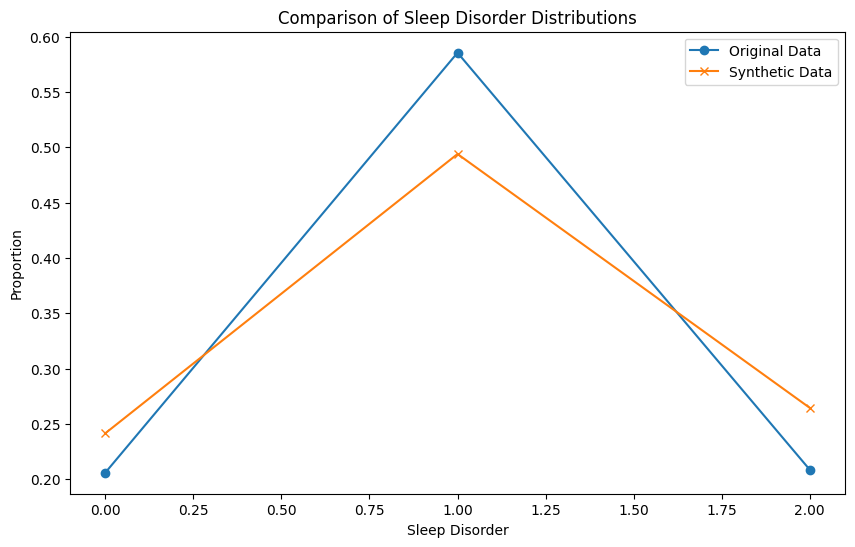

In [ ]:
# Validate synthetic data distribution

# Compare original and synthetic distributions (example for Sleep Disorder)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
original_dist = df['Sleep Disorder'].value_counts(normalize=True)
synthetic_dist = df_synthetic['Sleep Disorder'].value_counts(normalize=True)
plt.plot(original_dist.sort_index(), label='Original Data', marker='o')
plt.plot(synthetic_dist.sort_index(), label='Synthetic Data', marker='x')
plt.title('Comparison of Sleep Disorder Distributions')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion')
plt.legend()
plt.show()


In [ ]:
df = df_synthetic

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper_BP,Lower_BP
0,-21,1,31,6,5.960310,6,28,8,2,76,4731,0,130.465948,84.218561
1,161,0,33,0,7.133308,8,57,5,0,70,7068,1,118.755889,74.847401
2,55,1,34,1,7.512440,8,28,8,0,70,8021,1,120.029219,80.308468
3,-25,1,25,6,6.222399,5,56,7,2,81,2305,2,139.665576,87.719533
4,284,0,35,10,6.363246,6,44,7,3,74,6120,0,129.507524,84.168997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,58,1,32,1,8.089813,7,74,6,0,70,7991,1,121.241459,80.106381
1996,310,0,56,5,8.129629,9,75,3,0,68,6912,2,139.190245,93.874312
1997,350,0,56,2,8.167311,9,73,3,0,65,4915,2,140.975835,79.988844
1998,287,0,51,5,7.970961,9,88,3,3,76,5035,1,125.897475,80.310185


In [ ]:
# Separate features and target variable
X = df.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

In [ ]:
# Encode target variable
y = encoder.fit_transform(y)

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize dictionaries to store results
training_results = []
cross_val_results = []
testing_results = []


model_dict = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='sigmoid', C=0.01, gamma='auto', random_state=42),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', random_state=42),  # Explicitly set criterion='gini'
    "Random Forest": RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42),  # Explicitly set n_estimators=100 and criterion='gini'
    "ANN": MLPClassifier(hidden_layer_sizes=(100, 200), activation='relu', solver='adam', max_iter=2000, random_state=42)  # Default ANN settings
}

In [ ]:
# Training Phase (Table 3)
print("\nCalculating Training Phase Results...")
for model_name, model in model_dict.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    training_results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_train, train_pred),
        "Precision": precision_score(y_train, train_pred, average='weighted'),
        "Recall": recall_score(y_train, train_pred, average='weighted'),
        "F1-Score": f1_score(y_train, train_pred, average='weighted')
    })


Calculating Training Phase Results...


In [ ]:
# 5-Fold Cross-Validation Phase (Table 4)
print("\nPerforming 5-Fold Cross-Validation...")
for model_name, model in model_dict.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_results.append({
        "Model": model_name,
        "Mean Accuracy": np.mean(cv_scores),
        "Std Dev": np.std(cv_scores)
    })


Performing 5-Fold Cross-Validation...


In [ ]:
# Testing Phase (Table 5)
print("\nCalculating Testing Phase Results...")
for model_name, model in model_dict.items():  # Iterate over model objects
    predictions = model.predict(X_test)  # Get predictions using the model
    testing_results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, predictions),  # Pass predictions, not the model
        "Precision": precision_score(y_test, predictions, average='weighted'),
        "Recall": recall_score(y_test, predictions, average='weighted'),
        "F1-Score": f1_score(y_test, predictions, average='weighted')
    })


Calculating Testing Phase Results...


In [ ]:
# Convert results to DataFrame for better readability
training_df = pd.DataFrame(training_results)
cross_val_df = pd.DataFrame(cross_val_results)
testing_df = pd.DataFrame(testing_results)

# Display Results
print("\nTable 3: Training Phase Results")
print(training_df)

print("\nTable 4: 5-Fold Cross-Validation Results")
print(cross_val_df)

print("\nTable 5: Testing Phase Results")
print(testing_df)


Table 3: Training Phase Results
           Model  Accuracy  Precision    Recall  F1-Score
0            KNN  0.919286   0.919088  0.919286  0.918614
1            SVM  0.880000   0.886796  0.880000  0.876720
2  Decision Tree  1.000000   1.000000  1.000000  1.000000
3  Random Forest  1.000000   1.000000  1.000000  1.000000
4            ANN  0.993571   0.993569  0.993571  0.993563

Table 4: 5-Fold Cross-Validation Results
           Model  Mean Accuracy   Std Dev
0            KNN       0.904286  0.009422
1            SVM       0.876429  0.012495
2  Decision Tree       0.877857  0.014357
3  Random Forest       0.917857  0.011737
4            ANN       0.892143  0.006145

Table 5: Testing Phase Results
           Model  Accuracy  Precision    Recall  F1-Score
0            KNN  0.906667   0.906216  0.906667  0.905969
1            SVM  0.881667   0.884505  0.881667  0.877897
2  Decision Tree  0.876667   0.877881  0.876667  0.876993
3  Random Forest  0.908333   0.908472  0.908333  0.907890
4  

# **Genetic Algorithm Implementation for Best Feature Selection**

GA is used to tune the parameters and solve optimization problems
This is a comprehensive problem that involves implementing several machine learning algorithms, hyperparameter optimization using **Genetic Algorithm (GA)**, and evaluating the models with various metrics, including t-tests and confusion matrices. Here's how we can approach this step by step in Python:

In [ ]:
!pip install geneticalgorithm

In [ ]:
from geneticalgorithm import geneticalgorithm as ga # Import the geneticalgorithm package
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Genetic Algorithm Parameters
ga_params = {
    'max_num_iteration': 50,            # Number of generations
    'population_size': 80,              # Population size
    'mutation_probability': 0.3,        # Probability of mutation
    'elit_ratio': 0.15,                 # Proportion of elite individuals
    'crossover_probability': 0.8,       # Probability of crossover
    'parents_portion': 0.3,             # Proportion of parents in the population
    'crossover_type': 'uniform',        # Type of crossover (uniform or one_point)
    'max_iteration_without_improv': 30  # Stop if no improvement
}

**Fitness Function for GA**

In [ ]:
def fitness_function(params, model_name):
    """
    Evaluate model performance with the given parameters and selected features.
    """
    try:
        # Initialize the model based on the name
        if model_name == 'KNN':
            k = max(1, int(round(params[0])))  # Ensure k is at least 1
            metric = 'euclidean' if params[1] < 0.5 else 'manhattan'  # Choose metric
            model = KNeighborsClassifier(n_neighbors=k, metric=metric)

        elif model_name == 'SVM':
            C = max(0.1, params[0])  # Ensure C > 0
            gamma = max(1e-4, params[1])  # Ensure gamma > 0
            model = SVC(C=C, gamma=gamma, kernel='rbf')

        elif model_name == 'DT':
            max_depth = max(2, int(round(params[0])))  # Ensure at least depth of 2
            min_samples_split = max(2, int(round(params[1])))  # At least 2 samples
            criterion = 'gini' if params[2] < 0.5 else 'entropy'  # Criterion for split
            max_features = None if params[3] < 0.5 else 'sqrt'  # Feature selection strategy
            min_samples_leaf = max(1, int(round(params[4])))  # At least one sample per leaf

            model = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                criterion=criterion,
                max_features=max_features,
                min_samples_leaf=min_samples_leaf
            )

        elif model_name == 'RF':
            max_depth = max(2, int(round(params[0])))  # Ensure valid max depth
            min_samples_split = max(2, int(round(params[1])))  # At least 2 samples
            n_estimators = max(10, int(round(params[2])))  # At least 10 estimators
            model = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, n_estimators=n_estimators)

        elif model_name == 'ANN':
            alpha = max(1e-4, params[0])  # Scale and ensure positive alpha
            learning_rate_init = max(1e-4, params[1])  # Ensure learning rate > 0
            hidden_layer_sizes = (max(1, int(round(params[1]))),)  # At least one neuron
            model = MLPClassifier(
                hidden_layer_sizes= hidden_layer_sizes,
                activation='relu',
                solver='adam',
                alpha=alpha,
                learning_rate_init=learning_rate_init,
                max_iter=2000
            )

        else:
            raise ValueError(f"Invalid model name: {model_name}")

        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(
            model,
            X_train,
            y_train,
            cv=cv,
            scoring='accuracy'
        )

        # Log parameters and performance for debugging
        print(f"Model: {model_name}, Parameters: {params}, CV Score: {scores.mean()}")

        # Return the fitness value (1 - accuracy) to minimize error
        return 1 - scores.mean()

    except Exception as e:
        # Log the error and return a high penalty value for invalid configurations
        print(f"Error in fitness function for {model_name} with params {params}: {e}")
        return 1.0  # High penalty for failure


**Optimize Each Model**

**KNN**

Model: KNN, Parameters: [24.25646481  0.62290277], CV Score: 0.9114285714285714
Model: KNN, Parameters: [1.88177113e+01 9.61367490e-03], CV Score: 0.9035714285714285
Model: KNN, Parameters: [2.59570455 0.4998999 ], CV Score: 0.89
Model: KNN, Parameters: [20.87480509  0.09585923], CV Score: 0.9028571428571428
Model: KNN, Parameters: [29.15262947  0.56379083], CV Score: 0.9092857142857144
Model: KNN, Parameters: [11.73065022  0.59293356], CV Score: 0.9085714285714286
Model: KNN, Parameters: [2.72218711 0.02430255], CV Score: 0.89
Model: KNN, Parameters: [20.10570089  0.89441355], CV Score: 0.9121428571428571
Model: KNN, Parameters: [1.08712028 0.51598112], CV Score: 0.8821428571428571
Model: KNN, Parameters: [10.96568924  0.16961649], CV Score: 0.9042857142857142
Model: KNN, Parameters: [20.89571887  0.24942578], CV Score: 0.9028571428571428
Model: KNN, Parameters: [5.29451405 0.29758163], CV Score: 0.8935714285714287
Model: KNN, Parameters: [19.05924667  0.11109999], CV Score: 0.9035714

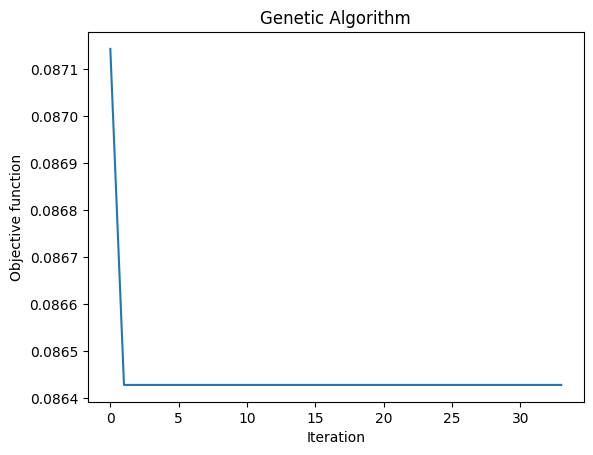


k: 25, Metric: manhattan


In [ ]:
from geneticalgorithm import geneticalgorithm as ga
import numpy as np

def knn_optimization():
    # Define parameter bounds for GA
    varbound_knn = np.array([
        [1, 30],  # k: Number of neighbors
        [0, 1]    # Distance metric: 0 for Euclidean, 1 for Manhattan
    ])

    # Run GA for KNN
    ga_knn = ga(
        function=lambda x: fitness_function(x, 'KNN'),  # Use the fitness function defined earlier
        dimension=2,                   # Two parameters (k and distance metric)
        variable_type="real",          # Allows mixed integer/real values
        variable_boundaries=varbound_knn,
        algorithm_parameters=ga_params
    )
    ga_knn.run()

    # Return optimized parameters
    return ga_knn.output_dict['variable']

# Run the optimization
knn_best_params = knn_optimization()

# Extract the best parameters
best_k = int(round(knn_best_params[0]))
best_metric = "euclidean" if knn_best_params[1] < 0.5 else "manhattan"

# Print results
print("Optimized KNN Parameters:")
print(f"k: {best_k}, Metric: {best_metric}")


**SVM**

Model: SVM, Parameters: [6.58509592e+01 1.92872257e-02], CV Score: 0.8942857142857144
Model: SVM, Parameters: [1.16110575 0.02398909], CV Score: 0.9014285714285715
Model: SVM, Parameters: [2.05692740e+01 5.54771553e-03], CV Score: 0.8971428571428571
Model: SVM, Parameters: [2.89511549e+01 2.51290109e-03], CV Score: 0.8978571428571428
Model: SVM, Parameters: [8.30708278e+01 2.27402952e-02], CV Score: 0.8914285714285715
Model: SVM, Parameters: [8.77956048e+01 5.25470109e-04], CV Score: 0.8985714285714284
Model: SVM, Parameters: [9.56485086e+01 2.59195920e-02], CV Score: 0.8878571428571428
Model: SVM, Parameters: [4.72963797 0.04963008], CV Score: 0.9014285714285715
Model: SVM, Parameters: [0.28960628 0.05432318], CV Score: 0.9057142857142857
Model: SVM, Parameters: [6.41768851 0.07931657], CV Score: 0.8985714285714286
Model: SVM, Parameters: [8.62499748e+01 2.22966171e-02], CV Score: 0.8914285714285715
Model: SVM, Parameters: [1.37420954e+01 3.18235745e-03], CV Score: 0.8978571428571428


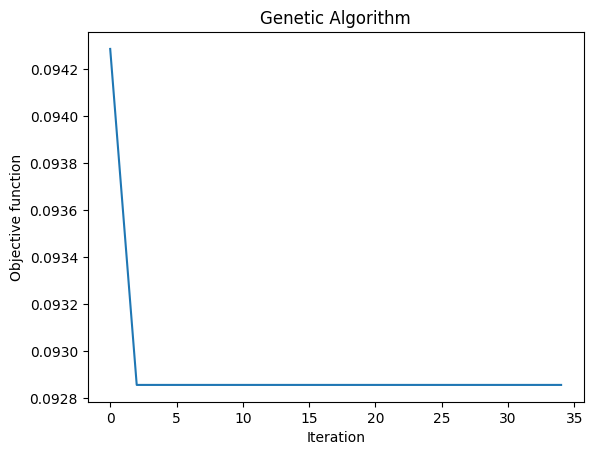

In [ ]:
def svm_optimization():
    # Parameter ranges for SVM: C, gamma
    varbound = np.array([[0.1, 100],  # Range for C
                         [0.0001, 0.1]])  # Range for gamma

    algorithm = ga(
        function=lambda x: fitness_function(x, 'SVM'),
        dimension=2,
        variable_type='real',
        variable_boundaries=varbound,
        algorithm_parameters=ga_params
    )
    algorithm.run()
    return algorithm.output_dict['variable']

svm_best_params = svm_optimization()
print("Optimized SVM Parameters (C, gamma):", svm_best_params)


**Decision Tree**

Model: DT, Parameters: [13.71194269 15.64013219  0.26021009  0.14145821  6.67801405], CV Score: 0.887142857142857
Model: DT, Parameters: [22.51370515  4.00225343  0.48752359  0.48746541  7.29962776], CV Score: 0.8857142857142858
Model: DT, Parameters: [18.09621123  8.88775813  0.14206008  0.60080163  4.75562443], CV Score: 0.8728571428571428
Model: DT, Parameters: [14.41746656  6.17076169  0.28315417  0.76530651  1.32032678], CV Score: 0.8657142857142857
Model: DT, Parameters: [13.86839008  8.3342677   0.93162724  0.9625804   6.33877228], CV Score: 0.8807142857142857
Model: DT, Parameters: [ 5.79777047 10.86423934  0.67519154  0.49685495  5.62148285], CV Score: 0.8978571428571428
Model: DT, Parameters: [18.89042783  7.84429362  0.0828521   0.77930698  1.4370012 ], CV Score: 0.8607142857142858
Model: DT, Parameters: [9.63204086e+00 1.54910241e+01 9.71956776e-03 9.25570545e-01
 9.73939226e+00], CV Score: 0.8728571428571428
Model: DT, Parameters: [8.86431993 8.31812281 0.15743949 0.738653

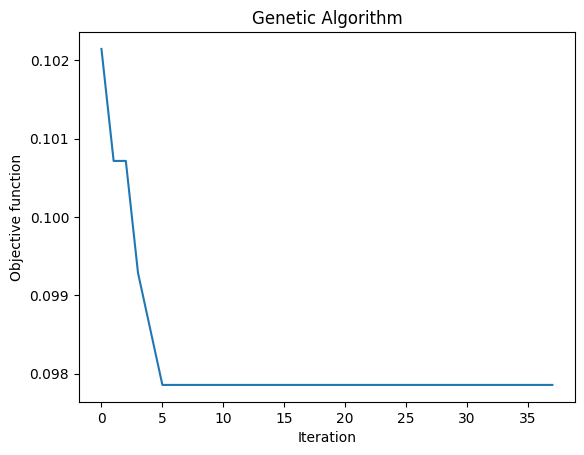

In [ ]:
def dt_optimization():
    # Parameter ranges for Decision Tree: max_depth, min_samples_split
    varbound_dt = np.array([
    [2, 25],   # Range for max_depth
    [2, 20],   # Range for min_samples_split
    [0, 1],    # Binary range for criterion (0 for 'gini', 1 for 'entropy')
    [0, 1],    # Binary range for max_features (0 for None, 1 for 'sqrt')
    [1, 10]    # Range for min_samples_leaf
])
    ga_params['function_timeout'] = 20  # Ensure timeout for fitness function
    algorithm = ga(
        function=lambda x: fitness_function(x, 'DT'),
        dimension=5,  # Five parameters for DT
        variable_type='real',
        variable_boundaries=varbound_dt,
        algorithm_parameters=ga_params
    )
    algorithm.run()
    return algorithm.output_dict['variable']

dt_best_params = dt_optimization()
print("Optimized Decision Tree Parameters:", dt_best_params)


**Random Forest**

Model: RF, Parameters: [16.  6. 46.], CV Score: 0.9092857142857144
Model: RF, Parameters: [ 8.  7. 23.], CV Score: 0.9071428571428571
Model: RF, Parameters: [16.  6. 27.], CV Score: 0.9128571428571428
Model: RF, Parameters: [ 5.  9. 29.], CV Score: 0.9135714285714286
Model: RF, Parameters: [16. 10. 39.], CV Score: 0.9135714285714286
Model: RF, Parameters: [ 7.  7. 17.], CV Score: 0.9107142857142858
Model: RF, Parameters: [ 5.  9. 24.], CV Score: 0.9100000000000001
Model: RF, Parameters: [16. 10. 21.], CV Score: 0.9057142857142857
Model: RF, Parameters: [12.  4. 30.], CV Score: 0.9142857142857143
Model: RF, Parameters: [12.  8. 10.], CV Score: 0.9057142857142857
Model: RF, Parameters: [17.  9. 36.], CV Score: 0.9171428571428573
Model: RF, Parameters: [12.  5. 24.], CV Score: 0.9178571428571429
Model: RF, Parameters: [16.  3. 18.], CV Score: 0.905
Model: RF, Parameters: [14.  8. 40.], CV Score: 0.9128571428571428
Model: RF, Parameters: [14. 10. 33.], CV Score: 0.9078571428571429
Model: R

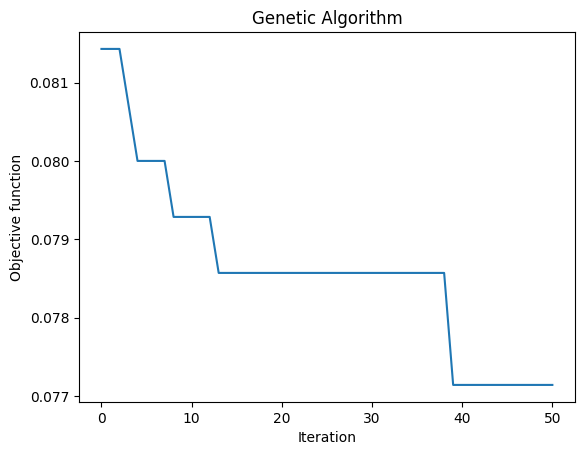

Optimized RF Parameters (max_depth, min_samples_split, n_estimators): [11.  7. 47.]


In [ ]:
def rf_optimization():
    # Parameter ranges for Random Forest: max_depth, min_samples_split, n_estimators
    varbound = np.array([[5, 20],     # Range for max_depth
                         [2, 10],     # Range for min_samples_split
                         [10, 50]])  # Range for n_estimators

    algorithm = ga(
        function=lambda x: fitness_function(x, 'RF'),
        dimension=3,
        variable_type='int',
        variable_boundaries=varbound,
        algorithm_parameters=ga_params
    )
    algorithm.run()
    return algorithm.output_dict['variable']

rf_best_params = rf_optimization()
print("Optimized RF Parameters (max_depth, min_samples_split, n_estimators):", rf_best_params)


**ANN**

Model: ANN, Parameters: [ 0.04206577 21.0874962   1.1355756  40.73703979], CV Score: 0.7378571428571428
Model: ANN, Parameters: [2.27013109e-02 1.48571374e+01 1.98275131e+00 5.68634700e+01], CV Score: 0.5964285714285714
Model: ANN, Parameters: [ 0.08646521 66.91206892  1.16101646 24.550567  ], CV Score: 0.8578571428571429
Model: ANN, Parameters: [4.39293388e-02 3.73928364e+01 2.66985345e+00 8.29749832e+01], CV Score: 0.7571428571428571
Model: ANN, Parameters: [1.01384523e-03 7.67191987e+01 2.30673565e+00 9.05368908e+01], CV Score: 0.8492857142857142
Model: ANN, Parameters: [8.06276795e-02 9.74119199e+01 1.92681502e+00 5.93118304e+01], CV Score: 0.8392857142857142
Model: ANN, Parameters: [3.18960756e-02 2.94036456e+01 2.66302746e+00 7.47205440e+01], CV Score: 0.8321428571428573
Model: ANN, Parameters: [1.82339903e-02 7.93256472e+01 2.22458532e+00 3.25951278e+01], CV Score: 0.8321428571428571
Model: ANN, Parameters: [ 0.0979329  42.36934544  1.48707692 78.46660457], CV Score: 0.821428571

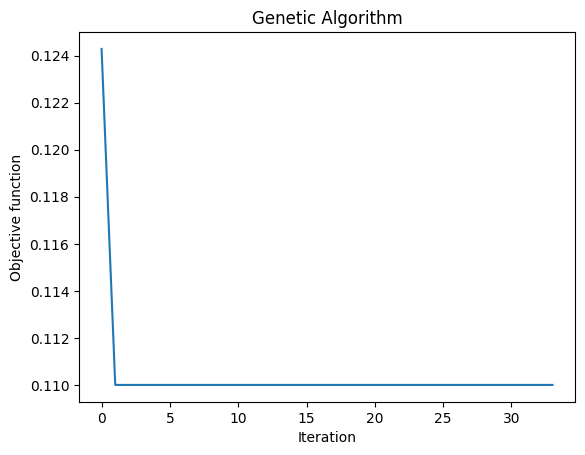

In [ ]:
def ann_optimization():
    # Parameter ranges for ANN: learning_rate_init
    varbound_ann = np.array([
    [1e-4, 1e-1],   # Range for alpha
    [10, 100],    # Range for learning_rate_init
    [1, 5],        # Range for number of hidden layers
    [20, 150]     # Range for number of neurons in each hidden layer
])

    algorithm = ga(
        function=lambda x: fitness_function(x, 'ANN'),
        dimension=4,
        variable_type='real',
        variable_boundaries=varbound_ann,
        algorithm_parameters=ga_params,
        function_timeout=60
    )
    algorithm.run()
    return algorithm.output_dict['variable']

ann_best_params = ann_optimization()
print("Optimized ANN Parameters (learning_rate_init):", ann_best_params)


In [ ]:
# Display optimized parameters
print(f"Optimized KNN Parameters: k={int(round(knn_best_params[0]))}, Metric={['euclidean', 'manhattan'][int(round(knn_best_params[1]))]}")
print(f"Optimized SVM Parameters: C={svm_best_params[0]}, Gamma={svm_best_params[1]}")
print(f"Optimized DT Parameters: Max Depth={int(round(dt_best_params[0]))}, Min Samples Split={int(round(dt_best_params[1]))}")
print(f"Optimized RF Parameters: Max Depth={int(round(rf_best_params[0]))}, Min Samples Split={int(round(rf_best_params[1]))}, N Estimators={int(round(rf_best_params[2]))}")
print(f"Optimized ANN Parameters: Learning Rate={ann_best_params[0] / 1000}, Hidden Layer Sizes={int(round(ann_best_params[1]))}")


Optimized KNN Parameters: k=25, Metric=manhattan
Optimized SVM Parameters: C=1.1611057454205664, Gamma=0.07823561475481444
Optimized DT Parameters: Max Depth=16, Min Samples Split=19
Optimized RF Parameters: Max Depth=11, Min Samples Split=7, N Estimators=47
Optimized ANN Parameters: Learning Rate=4.392933882680871e-05, Hidden Layer Sizes=92


# Train Models with Optimized Parameters
Once the GA identifies the best parameters for each model, train and evaluate them using the full dataset.

In [ ]:
# Train models with optimized parameters
models = {
    'KNN': KNeighborsClassifier(
        n_neighbors=int(round(knn_best_params[0])),
        metric=['euclidean', 'manhattan'][int(round(knn_best_params[1]))]
    ),
    'SVM': SVC(
        C=svm_best_params[0],
        gamma=svm_best_params[1],
        kernel='rbf'
    ),
    'DT': DecisionTreeClassifier(
        max_depth=int(round(dt_best_params[0])),
        min_samples_split=int(round(dt_best_params[1])),
        criterion=['gini', 'entropy'][int(round(dt_best_params[2]))]  # Add 'criterion' parameter
    ),
    'RF': RandomForestClassifier(
        max_depth=int(round(rf_best_params[0])),
        min_samples_split=int(round(rf_best_params[1])),
        n_estimators=int(round(rf_best_params[2])),
        criterion='gini'  # Optional, default is 'gini'
    ),
    'ANN': MLPClassifier(
        hidden_layer_sizes=(max(1, int(round(ann_best_params[1]))),),  # Ensure at least one neuron
        learning_rate_init=max(1e-4, ann_best_params[0] / 1000),  # Scale learning rate, ensure > 0
        alpha=max(1e-4, ann_best_params[2]),  # Ensure positive alpha
        activation='relu',  # Use the same activation function as during optimization
        solver='adam',  # Fixed solver
        max_iter=2000  # Fixed maximum iterations
    )
}

# Evaluate models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    print(f"\nTraining and Evaluating Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")



Training and Evaluating Model: KNN
Accuracy: 0.8917
Precision: 0.8925
Recall: 0.8917
F1 Score: 0.8913

Training and Evaluating Model: SVM
Accuracy: 0.8983
Precision: 0.8988
Recall: 0.8983
F1 Score: 0.8982

Training and Evaluating Model: DT
Accuracy: 0.8833
Precision: 0.8823
Recall: 0.8833
F1 Score: 0.8824

Training and Evaluating Model: RF
Accuracy: 0.9117
Precision: 0.9116
Recall: 0.9117
F1 Score: 0.9112

Training and Evaluating Model: ANN
Accuracy: 0.9000
Precision: 0.8999
Recall: 0.9000
F1 Score: 0.8993



Model: KNN
Accuracy: 0.8916666666666667
Precision: 0.8924921956627152
Recall: 0.8916666666666667
F1 Score: 0.891252761678862

Model: SVM
Accuracy: 0.8983333333333333
Precision: 0.8987988041679368
Recall: 0.8983333333333333
F1 Score: 0.8981897462501157

Model: DT
Accuracy: 0.8833333333333333
Precision: 0.8822849737561561
Recall: 0.8833333333333333
F1 Score: 0.8824448177337065

Model: RF
Accuracy: 0.9116666666666666
Precision: 0.9119585654987304
Recall: 0.9116666666666666
F1 Score: 0.911341279194145

Model: ANN
Accuracy: 0.9
Precision: 0.9001411660289542
Recall: 0.9
F1 Score: 0.8995973980816929


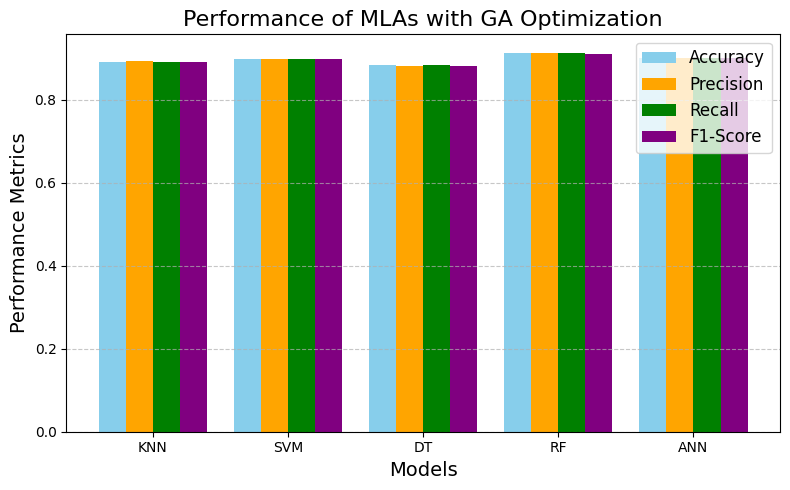

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_ga = []
precision_ga = []
recall_ga = []
f1_score_list_ga = []

for name, model in models.items():
    y_pred = model.predict(X_test)  # Calculate y_pred for each model

    # Store the metric values in lists
    accuracy_ga.append(accuracy_score(y_test, y_pred))
    precision_ga.append(precision_score(y_test, y_pred, average='weighted'))
    recall_ga.append(recall_score(y_test, y_pred, average='weighted'))
    f1_score_list_ga.append(f1_score(y_test, y_pred, average='weighted'))

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_ga[-1])  # Print the last added values
    print("Precision:", precision_ga[-1])
    print("Recall:", recall_ga[-1])
    print("F1 Score:", f1_score_list_ga[-1])

# Bar width
bar_width = 0.2

# X positions for the groups
x = np.arange(len(models))

# Create the plot
plt.figure(figsize=(8, 5))

# Plot each metric as a separate group
plt.bar(x - bar_width, accuracy_ga, width=bar_width, label='Accuracy', color='skyblue')
plt.bar(x, precision_ga, width=bar_width, label='Precision', color='orange')
plt.bar(x + bar_width, recall_ga, width=bar_width, label='Recall', color='green')
plt.bar(x + 2 * bar_width, f1_score_list_ga, width=bar_width, label='F1-Score', color='purple') # Changed variable name here

# Customize the plot
plt.xticks(x + bar_width / 2, models)  # Position x-axis labels
plt.xlabel('Models', fontsize=14)
plt.ylabel('Performance Metrics', fontsize=14)
plt.title('Performance of MLAs with GA Optimization', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# T-Test Analysis

In [ ]:
from scipy.stats import ttest_ind

# Helper function to perform and display t-test results
def perform_t_test(y_true, y_pred, model_name):
    """
    Perform a t-test between the true labels and predicted labels.
    """
    t_stat, p_value = ttest_ind(y_true, y_pred)
    print(f"\nModel: {model_name}")
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")


# Evaluate models and perform t-tests
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Perform t-test
    perform_t_test(y_test, y_pred, name)



Model: KNN
T-Statistic: -0.5203
P-Value: 0.6029

Model: SVM
T-Statistic: -0.4381
P-Value: 0.6614

Model: DT
T-Statistic: 0.5959
P-Value: 0.5514

Model: RF
T-Statistic: -0.1599
P-Value: 0.8730

Model: ANN
T-Statistic: -0.2792
P-Value: 0.7802


# **CONTRIBUTION TO PAPER**

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from skopt import BayesSearchCV  # For Bayesian Optimization
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Import LabelEncoder here

In [ ]:
# Load dataset
file_path = '/content/drive/MyDrive/Datasets/synthetic_sleep_data_fixed.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper_BP,Lower_BP
0,-21,1,31,6,5.960310,6,28,8,2,76,4731,0,130.465948,84.218561
1,161,0,33,0,7.133308,8,57,5,0,70,7068,1,118.755889,74.847401
2,55,1,34,1,7.512440,8,28,8,0,70,8021,1,120.029219,80.308468
3,-25,1,25,6,6.222399,5,56,7,2,81,2305,2,139.665576,87.719533
4,284,0,35,10,6.363246,6,44,7,3,74,6120,0,129.507524,84.168997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,58,1,32,1,8.089813,7,74,6,0,70,7991,1,121.241459,80.106381
1996,310,0,56,5,8.129629,9,75,3,0,68,6912,2,139.190245,93.874312
1997,350,0,56,2,8.167311,9,73,3,0,65,4915,2,140.975835,79.988844
1998,287,0,51,5,7.970961,9,88,3,3,76,5035,1,125.897475,80.310185


In [ ]:
# Separate features and target variable
X = df.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

In [ ]:
# Encode target variable
y = encoder.fit_transform(y)

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **GRID SEARCH and RANDOM SEARCH**

**1. Define parameter spaces for Grid Search and Random Search**

In [ ]:
# Define parameter spaces for Grid Search and Random Search
grid_param_spaces = {
    'KNN': {'n_neighbors': list(range(1, 31)), 'metric': ['euclidean', 'manhattan']},
    'SVM': {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]},
    'DT': {'max_depth': list(range(2, 11)), 'min_samples_split': list(range(2, 6)), 'criterion': ['gini', 'entropy']},
    'RF': {'max_depth': list(range(5, 21)), 'min_samples_split': list(range(2, 11)), 'n_estimators': [10, 50, 100]},
    'ANN': {
        'hidden_layer_sizes': [(24,), (50,), (100,)],
        'learning_rate_init': [0.001, 0.01, 0.1],
        'max_iter': [500, 1000, 2500]
    }
}

# Define parameter spaces for Random Search (same as Grid, but for RandomizedSearchCV)
random_param_spaces = {
    'KNN': {'n_neighbors': list(range(1, 31)), 'metric': ['euclidean', 'manhattan']},
    'SVM': {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]},
    'DT': {'max_depth': list(range(2, 11)), 'min_samples_split': list(range(2, 6)), 'criterion': ['gini', 'entropy']},
    'RF': {'max_depth': list(range(5, 21)), 'min_samples_split': list(range(2, 11)), 'n_estimators': [10, 50, 100]},
    'ANN': {
        'hidden_layer_sizes': [(24,), (50,), (100,)],
        'learning_rate_init': [0.001, 0.01, 0.1],
        'max_iter': [500, 1000, 2500]
    }
}


**2. Define Functions for Grid and Random Search Optimization**

In [ ]:
def optimize_with_grid_search(model, params, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    grid_search_results = grid_search.cv_results_  # This contains detailed results from the grid search
    return grid_search.best_estimator_, grid_search.best_score_

def optimize_with_random_search(model, params, X_train, y_train):
    n_iter = min(50, np.prod([len(v) for v in params.values() if isinstance(v, list)]))  # Cap iterations
    random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=n_iter, cv=5, scoring='accuracy', verbose=1, random_state=42)
    random_search.fit(X_train, y_train)
    random_search_results = random_search.cv_results_  # This contains detailed results from the random search
    return random_search.best_estimator_, random_search.best_score_


**3. Define Models**

In [ ]:
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'ANN': MLPClassifier(hidden_layer_sizes=(100, 200), learning_rate_init=0.01, max_iter=3000, early_stopping=True, random_state=42)
}

**4. Optimize Models Using Grid Search and Random Search**

In [ ]:
results = {'Grid Search': {}, 'Random Search': {}}

grid_optimized_params = {}
random_optimized_params = {}

# Iterate over models for optimization
for model_name, model in models.items():
    print(f"\nOptimizing {model_name}...")
    # Grid Search Optimization
    best_model, best_score = optimize_with_grid_search(model, grid_param_spaces[model_name], X_train, y_train)
    results['Grid Search'][model_name] = {'Model': best_model, 'Score': best_score}
    grid_optimized_params[model_name] = best_model.get_params()

    # Random Search Optimization
    best_model, best_score = optimize_with_random_search(model, random_param_spaces[model_name], X_train, y_train)
    results['Random Search'][model_name] = {'Model': best_model, 'Score': best_score}
    random_optimized_params[model_name] = best_model.get_params()


Optimizing KNN...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Optimizing SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Optimizing DT...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Optimizing RF...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Optimizing ANN...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


**5. Train and Evaluate the Optimized Models**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import NotFittedError

# Select the optimization method: 'grid' or 'random'
optimization_method = 'grid'  # Change to 'random' if you want to use random search parameters

# Determine which parameter set to use
if optimization_method == 'grid':
    optimized_params = grid_optimized_params
elif optimization_method == 'random':
    optimized_params = random_optimized_params
else:
    raise ValueError("Invalid optimization method. Choose 'grid' or 'random'.")

models_with_params = {}

# Apply the optimized parameters to train and evaluate models
for model_name, model in models.items():
    print(f"\nApplying {optimization_method} optimized parameters to {model_name}...")
    params = optimized_params.get(model_name, {})

    try:
        if model_name == 'KNN':
            models_with_params[model_name] = KNeighborsClassifier(
                n_neighbors=params.get('n_neighbors', 5),  # Default to 5 if not found
                metric=params.get('metric', 'minkowski'),  # Default to 'minkowski' if not optimized
                weights=params.get('weights', 'uniform')  # Default to 'uniform' if not optimized
            )
        elif model_name == 'SVM':
            models_with_params[model_name] = SVC(
                C=params.get('C', 1.0),
                kernel=params.get('kernel', 'rbf'),
                gamma=params.get('gamma', 'scale'),
                probability=True  # Enable probability predictions if needed
            )
        elif model_name == 'DT':
            models_with_params[model_name] = DecisionTreeClassifier(
                max_depth=params.get('max_depth', None),
                criterion=params.get('criterion', 'gini'),
                min_samples_split=params.get('min_samples_split', 2)
            )
        elif model_name == 'RF':
            models_with_params[model_name] = RandomForestClassifier(
                n_estimators=params.get('n_estimators', 100),
                max_depth=params.get('max_depth', None),
                min_samples_split=params.get('min_samples_split', 2),
                random_state=42
            )
        elif model_name == 'ANN':
            models_with_params[model_name] = MLPClassifier(
                hidden_layer_sizes=params.get('hidden_layer_sizes', (100,)),
                learning_rate_init=params.get('learning_rate_init', 0.001),
                max_iter=params.get('max_iter', 200),
                random_state=42,
                early_stopping=params.get('early_stopping', False)  # Consistent with optimized params
            )
        else:
            print(f"Model {model_name} is not recognized and will be skipped.")
    except KeyError as e:
        print(f"Missing parameter for {model_name}: {e}. Skipping this model.")
        continue

# Train and evaluate models
for name, model in models_with_params.items():
    print(f"\nTraining and Evaluating Model: {name}")
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    except NotFittedError as e:
        print(f"Model {name} could not be trained: {e}")
    except Exception as e:
        print(f"An error occurred during training or evaluation for {name}: {e}")



Applying grid optimized parameters to KNN...

Applying grid optimized parameters to SVM...

Applying grid optimized parameters to DT...

Applying grid optimized parameters to RF...

Applying grid optimized parameters to ANN...

Training and Evaluating Model: KNN
Accuracy: 0.9017
Precision: 0.9010
Recall: 0.9017
F1 Score: 0.9012

Training and Evaluating Model: SVM
Accuracy: 0.8967
Precision: 0.8973
Recall: 0.8967
F1 Score: 0.8965

Training and Evaluating Model: DT
Accuracy: 0.8700
Precision: 0.8707
Recall: 0.8700
F1 Score: 0.8701

Training and Evaluating Model: RF
Accuracy: 0.9067
Precision: 0.9066
Recall: 0.9067
F1 Score: 0.9061

Training and Evaluating Model: ANN
Accuracy: 0.9067
Precision: 0.9061
Recall: 0.9067
F1 Score: 0.9058


In [ ]:
# Select the optimization method: 'grid' or 'random'
optimization_method = 'random'

# Determine which parameter set to use
if optimization_method == 'grid':
    optimized_params = grid_optimized_params
elif optimization_method == 'random':
    optimized_params = random_optimized_params
else:
    raise ValueError("Invalid optimization method. Choose 'grid' or 'random'.")

models_with_params = {}

# Apply the optimized parameters to train and evaluate models
for model_name, model in models.items():
    print(f"\nApplying {optimization_method} optimized parameters to {model_name}...")
    params = optimized_params.get(model_name, {})

    try:
        if model_name == 'KNN':
            models_with_params[model_name] = KNeighborsClassifier(
                n_neighbors=params.get('n_neighbors', 5),  # Default to 5 if not found
                metric=params.get('metric', 'minkowski'),  # Default to 'minkowski' if not optimized
                weights=params.get('weights', 'uniform')  # Default to 'uniform' if not optimized
            )
        elif model_name == 'SVM':
            models_with_params[model_name] = SVC(
                C=params.get('C', 1.0),
                kernel=params.get('kernel', 'rbf'),
                gamma=params.get('gamma', 'scale'),
                probability=True  # Enable probability predictions if needed
            )
        elif model_name == 'DT':
            models_with_params[model_name] = DecisionTreeClassifier(
                max_depth=params.get('max_depth', None),
                criterion=params.get('criterion', 'gini'),
                min_samples_split=params.get('min_samples_split', 2)
            )
        elif model_name == 'RF':
            models_with_params[model_name] = RandomForestClassifier(
                n_estimators=params.get('n_estimators', 100),
                max_depth=params.get('max_depth', None),
                min_samples_split=params.get('min_samples_split', 2),
                random_state=42
            )
        elif model_name == 'ANN':
            models_with_params[model_name] = MLPClassifier(
                hidden_layer_sizes=params.get('hidden_layer_sizes', (100,)),
                learning_rate_init=params.get('learning_rate_init', 0.001),
                max_iter=params.get('max_iter', 200),
                random_state=42,
                early_stopping=params.get('early_stopping', False)  # Consistent with optimized params
            )
        else:
            print(f"Model {model_name} is not recognized and will be skipped.")
    except KeyError as e:
        print(f"Missing parameter for {model_name}: {e}. Skipping this model.")
        continue

# Train and evaluate models
for name, model in models_with_params.items():
    print(f"\nTraining and Evaluating Model: {name}")
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    except NotFittedError as e:
        print(f"Model {name} could not be trained: {e}")
    except Exception as e:
        print(f"An error occurred during training or evaluation for {name}: {e}")



Applying random optimized parameters to KNN...

Applying random optimized parameters to SVM...

Applying random optimized parameters to DT...

Applying random optimized parameters to RF...

Applying random optimized parameters to ANN...

Training and Evaluating Model: KNN
Accuracy: 0.9017
Precision: 0.9010
Recall: 0.9017
F1 Score: 0.9012

Training and Evaluating Model: SVM
Accuracy: 0.8967
Precision: 0.8973
Recall: 0.8967
F1 Score: 0.8965

Training and Evaluating Model: DT
Accuracy: 0.8683
Precision: 0.8685
Recall: 0.8683
F1 Score: 0.8682

Training and Evaluating Model: RF
Accuracy: 0.9083
Precision: 0.9081
Recall: 0.9083
F1 Score: 0.9078

Training and Evaluating Model: ANN
Accuracy: 0.9067
Precision: 0.9061
Recall: 0.9067
F1 Score: 0.9058


**6. Compare the Results**

          Method Model     Score
0    Grid Search   KNN  0.901667
1    Grid Search   SVM  0.896667
2    Grid Search    DT  0.873333
3    Grid Search    RF  0.903333
4    Grid Search   ANN  0.906667
5  Random Search   KNN  0.901667
6  Random Search   SVM  0.896667
7  Random Search    DT  0.871667
8  Random Search    RF  0.911667
9  Random Search   ANN  0.906667


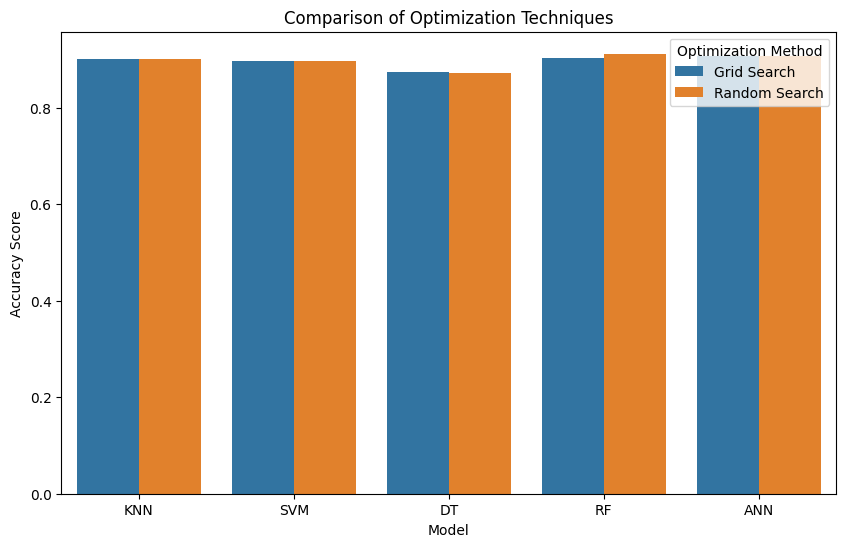

In [ ]:
# Aggregate results based on test set performance
comparison_results = []
for method, method_results in results.items():
    for model_name, model_data in method_results.items():
        comparison_results.append({
            'Method': method,
            'Model': model_name,
            'Score': accuracy_score(y_test, model_data['Model'].predict(X_test))  # Test accuracy
        })
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)

# Visualize Results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Method', data=comparison_df)
plt.title('Comparison of Optimization Techniques')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.legend(title='Optimization Method')
plt.show()


**7. Statistical Comparison (T-test)**

In [ ]:
from scipy.stats import ttest_rel

# Example: Compare Grid Search and Random Search for KNN
# Ensure common models are present in both methods
common_models = list(set(results['Grid Search'].keys()) & set(results['Random Search'].keys()))

grid_scores = [results['Grid Search'][model]['Score'] for model in common_models]
random_scores = [results['Random Search'][model]['Score'] for model in common_models]

# Check if there are enough data points for a meaningful t-test
if len(grid_scores) >= 2 and len(random_scores) >= 2:
    t_stat, p_value = ttest_rel(grid_scores, random_scores)
    print(f"\nT-Test between Grid Search and Random Search:")
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")
else:
    print("\nNot enough common models or data points to perform a meaningful t-test.")



T-Test between Grid Search and Random Search:
T-Statistic: 1.5000
P-Value: 0.2080



Comparison of Optimization Techniques:
           Method Model     Score
0     Grid Search   KNN  0.901667
1     Grid Search   SVM  0.896667
2     Grid Search    DT  0.873333
3     Grid Search    RF  0.903333
4     Grid Search   ANN  0.906667
5   Random Search   KNN  0.901667
6   Random Search   SVM  0.896667
7   Random Search    DT  0.871667
8   Random Search    RF  0.911667
9   Random Search   ANN  0.906667
10             GA   KNN  0.891667
11             GA   SVM  0.898333
12             GA    DT  0.878333
13             GA    RF  0.906667
14             GA   ANN  0.901667


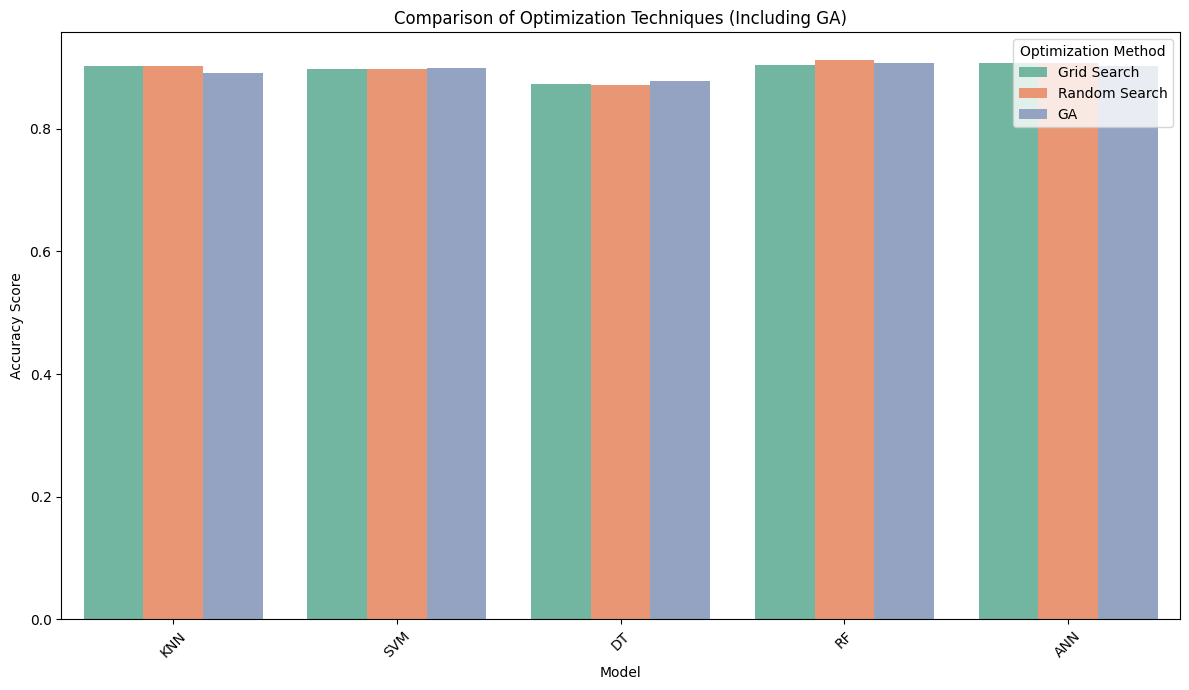

In [ ]:
ga_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Optimization Method': []
}
# Evaluate GA results
# Iterate over the models and store results in ga_results
for name, model in models.items():
    # print(f"Evaluating model: {name}")  # Debugging line
    model.fit(X_train, y_train)  # Explicitly train the model
    y_pred = model.predict(X_test)  # Predict test results
    ga_results['Model'].append(name)
    ga_results['Accuracy'].append(accuracy_score(y_test, y_pred))
    ga_results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    ga_results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    ga_results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))
    ga_results['Optimization Method'].append('GA')

# Convert GA results to DataFrame
ga_results_df = pd.DataFrame(ga_results)

# Aggregate results based on test set performance
comparison_results = []
for method, method_results in results.items():
    for model_name, model_data in method_results.items():
        comparison_results.append({
            'Method': method,
            'Model': model_name,
            'Score': accuracy_score(y_test, model_data['Model'].predict(X_test))  # Test accuracy
        })
# Include GA results in comparison
for i, row in ga_results_df.iterrows():
    comparison_results.append({
        'Method': row['Optimization Method'],
        'Model': row['Model'],
        'Score': row['Accuracy']
    })

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_results)
print("\nComparison of Optimization Techniques:")
print(comparison_df)

# Visualize Results
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Method', data=comparison_df, palette="Set2")
plt.title('Comparison of Optimization Techniques (Including GA)')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.legend(title='Optimization Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
